<a href="https://colab.research.google.com/github/mgwalker71/Car-Claims/blob/main/claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


#Car insurance claim prediction

<img src='https://drive.google.com/uc?id=1nSXbOmZ8wmKKvS_tXWoJMhxovayw6wAj'>

#Project Background
###Predicting the likelihood of car insurance claims is a crucial task for both insurance companies and policyholders, Accurate predictions allow insurance companies to set premiums at a level that reflects the risk of insuring a particular individual or vehicle, while also helping them to remain profitable by covering the cost of any claims that are made. The aim of this project is to identify the optimal machine learning model for predicting insurance claims, models selected include Logistic Regression, Random Forest, and TensorFlow.


##2. Data Selection
### In the absence of readily available company data due to potential data breach issues I have selected a small publicly available dataset from Kaggle - [Car Claim Insurance Dataset](https://www.kaggle.com/datasets/edwinthomas199/car-claim-insurance-dataset)

In [ ]:
df = pd.read_csv('/Carclaimsforinsurance.csv')
df.head()


,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,CLM_AMT,CLM_FLG,CAR_AGE,URBANICITY
0,100130023,0,05/02/1955 00:00,2,13,26763,Yes,141019,No,F,...,49,Private,11500,SUV,0,0,0,0,11,Highly Urban/ Urban
1,100263241,0,05/10/1961 00:00,0,9,156060,No,381438,Yes,M,...,29,Commercial,25230,Panel Truck,8207,1,0,0,9,Highly Urban/ Urban
2,100321982,0,12/11/1959 00:00,1,11,1965,Yes,0,No,F,...,21,Private,20630,Minivan,0,0,0,0,11,Highly Urban/ Urban
3,100391818,0,11/10/1961 00:00,1,10,62361,No,185738,Yes,F,...,32,Private,11540,SUV,3481,1,0,0,6,Highly Urban/ Urban
4,100549277,0,06/10/1966 00:00,1,10,34192,Yes,0,No,F,...,22,Commercial,13670,SUV,0,0,0,0,7,Highly Rural/ Rural


<img src= '\crash.jpg'>

##Data Features
####ID - Identification Variable
####KIDSDRIV - Number of teenagers among the car owner's children who drive a car
####BIRTH - Date of birth of the driver
####HOMEKIDS - No of childern the car owner has
####YOJ - Years on Job. How many years has the owner of the car been working?
####INCOME - Income of the driver
####PARENT1 - Is the car owner a Single Parent
####HOME_VAL - Value of the house owned by the car owner
####MSTATUS - Marital status of the car owner
####GENDER - Gender of the driver
####EDUCATION - Maximum Education level of the driver
####OCCUPATION - Occupation of the driver
####TRAVTIME - Time taken to get to work on an average
####CAR_USE - Purpose of using the car
####BLUEBOOK - What is the worth of the car. Value of the Vehicle(in dollars)
####CAR_TYPE - Car type
####OLDCLAIM - Total claim (in past 5 years - in dollars)
####CLM_FREQ - Number of claims (in past 5 years)
####CLM_AMT - If car was in a crash, what is the currently claimed amount($)
####CAR_AGE - Age of car
####URBANICITY - Where the car is being driven primarily

In [ ]:
y=df["CLM_FLG"]

In [ ]:
df1 = df

In [ ]:
df= df.drop(["CLM_FLG"],axis =1)
df= df.drop(["CLM_AMT"],axis =1)
df= df.drop(["BIRTH"],axis =1)
df= df.drop(["ID"],axis =1)

##Data Quality
### A data quality audit was carried out in order to check for any missing values which could impact on model performance.

In [ ]:
df.isnull().sum() # check for missing data


KIDSDRIV      0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
CAR_TYPE      0
OLDCLAIM      0
CLM_FREQ      0
CAR_AGE       0
URBANICITY    0
dtype: int64

C:\Users\mgw19\AppData\Local\Temp\ipykernel_11092\1257915875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #


<Axes: >

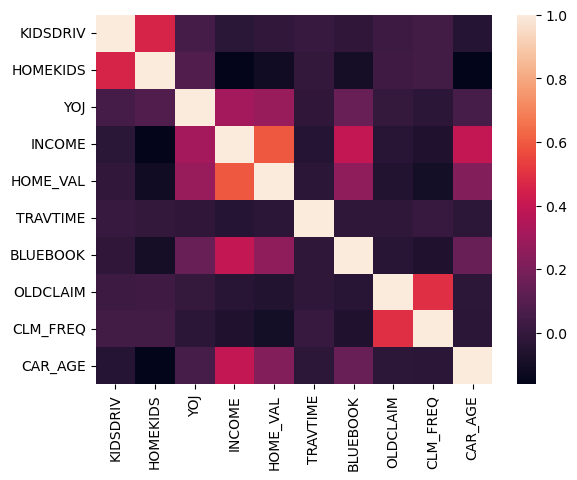

In [ ]:
sns.heatmap(df.corr()) #

A heatmap was plotted in order to check for any multicolinearity issues which could adversely affect the model performance. There appears to be high correlation between homeval and income.


In [ ]:
from sklearn.preprocessing import minmax_scale # Normalise the numerical columns
cols = df.select_dtypes(np.number).columns
df[cols] = minmax_scale(df[cols])

One hot encoding was utilised for the categorical variables to improve model performance

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: ylabel='Frequency'>

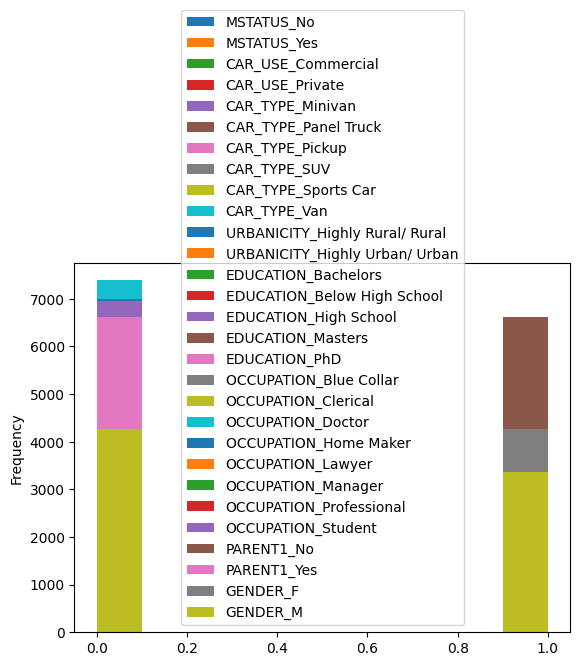

In [ ]:



    """Generate onehoteencoded features for all categorical columns in df"""

    from sklearn.preprocessing import OneHotEncoder
    model_oh = OneHotEncoder(handle_unknown="ignore", sparse=False)

    matrix = model_oh.fit_transform(df[["MSTATUS","CAR_USE","CAR_TYPE","URBANICITY","EDUCATION","OCCUPATION","PARENT1","GENDER"]])  # get a matrix of new features and values
    names = model_oh.get_feature_names_out()  # get names for these features
    df_oh = pd.DataFrame(data=matrix, columns=names, index=df.index)  # create df of these new features
    display(df_oh.plot.hist())
    df = pd.concat([df, df_oh], axis=1)  # concat with existing df
    df = df.drop(["MSTATUS"],axis =1)
    df = df.drop(["CAR_USE"],axis =1)
    df = df.drop(["CAR_TYPE"],axis =1)
    df = df.drop(["URBANICITY"],axis =1)
    df = df.drop(["EDUCATION"],axis =1)
    df = df.drop(["OCCUPATION"],axis =1)
    df = df.drop(["PARENT1"],axis =1)
    df = df.drop(["GENDER"],axis =1)


In [ ]:
X=df


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0, shuffle=True) #
print('Number of training instances:', len(X_train))
print('Number of test instances:', len(y_test))
print(X_train.shape)
print(X_test.shape)

Number of training instances: 5735
Number of test instances: 1912
(5735, 39)
(1912, 39)


In [ ]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KIDSDRIV                        7647 non-null   float64
 1   HOMEKIDS                        7647 non-null   float64
 2   YOJ                             7647 non-null   float64
 3   INCOME                          7647 non-null   float64
 4   HOME_VAL                        7647 non-null   float64
 5   TRAVTIME                        7647 non-null   float64
 6   BLUEBOOK                        7647 non-null   float64
 7   OLDCLAIM                        7647 non-null   float64
 8   CLM_FREQ                        7647 non-null   float64
 9   CAR_AGE                         7647 non-null   float64
 10  MSTATUS_No                      7647 non-null   float64
 11  MSTATUS_Yes                     7647 non-null   float64
 12  CAR_USE_Commercial              76

None

 A frequency plot of the dependent variable indicates that the data is imbalanced which may impair model performance. SMOTE (Synthetic Minority Over-sampling) can be employed to rebalance the minority class by generating synthetic samples. This can also reduce overfitting issues.

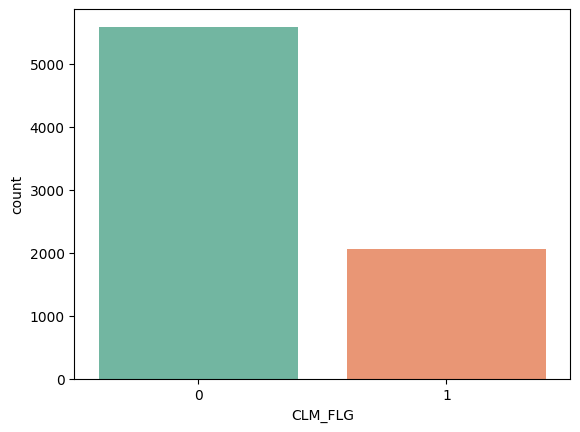

In [ ]:
# use a different colour palette in count plot
sns.countplot(x ='CLM_FLG', data = df1, palette = "Set2")

# Show the plot
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Print frequency after SMOTE
print("Class frequencies after SMOTE in training data:\n", y_train_resampled.value_counts())

Class frequencies after SMOTE in training data:
 0    4206
1    4206
Name: CLM_FLG, dtype: int64


In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled



###Logistic regression model

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if convergence issues arise
logreg.fit(X_train, y_train)
model = logreg

# Model prediction

y_logreg_pred = logreg.predict(X_test)

# Generate confusion matrix for logistic regression predictions
cm_logreg = confusion_matrix(y_test, y_logreg_pred)

# Extracting the values
TN_logreg, FP_logreg, FN_logreg, TP_logreg = cm_logreg.ravel()

# Display the results in a table format for Logistic Regression
table_logreg = f"""
+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  {TP_logreg} | False Negatives: {FN_logreg} |
+-----------------+------------------+
| Negative (0)    | False Positives: {FP_logreg} | True Negatives:  {TN_logreg} |
+-----------------+------------------+
"""

print("Logistic Regression Confusion Matrix:\n")
print(table_logreg)
# calculate the r-squared
from sklearn import metrics

r_squared = model.score(X_train, y_train)
print(r_squared)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_logreg_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_logreg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_logreg_pred))
print('Root Mean Squared Error:', RMSE)



Logistic Regression Confusion Matrix:


+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  405 | False Negatives: 124 |
+-----------------+------------------+
| Negative (0)    | False Positives: 394 | True Negatives:  989 |
+-----------------+------------------+

0.7501188777936282
Mean Absolute Error: 0.2709205020920502
Mean Squared Error: 0.2709205020920502
Root Mean Squared Error: 0.5205002421632964


An R square of 0.862 indicates that 86% of the dependent variable can be explained by the independent variables.

##Feature Importance
### A plot of feature importance appears to show that feature 5 (Travel Time) has the biggest impact, with feature 0 (Number of teenagers among the car owner's children who drive) and feature 21 (Urbanicity = Highly urban) having a large positive impact. Feature 6 (car value) appears to have a negative correlation with claims. Occupation of Doctor (feature 29) appear to show negative correlation, with feature 31(Lawyer) having positive correlation.

Feature: 0, Score: 1.62492
Feature: 1, Score: 0.24869
Feature: 2, Score: -0.17897
Feature: 3, Score: -1.01474
Feature: 4, Score: -1.68392
Feature: 5, Score: 2.94965
Feature: 6, Score: -1.80780
Feature: 7, Score: 0.56417
Feature: 8, Score: 0.89417
Feature: 9, Score: -0.19283
Feature: 10, Score: 0.15467
Feature: 11, Score: -0.15363
Feature: 12, Score: 0.45600
Feature: 13, Score: -0.45496
Feature: 14, Score: -0.62461
Feature: 15, Score: 0.05185
Feature: 16, Score: -0.19595
Feature: 17, Score: 0.17304
Feature: 18, Score: 0.54202
Feature: 19, Score: 0.05469
Feature: 20, Score: -1.41523
Feature: 21, Score: 1.41627
Feature: 22, Score: -0.17574
Feature: 23, Score: 0.17315
Feature: 24, Score: 0.24029
Feature: 25, Score: -0.39138
Feature: 26, Score: 0.15471
Feature: 27, Score: 0.13920
Feature: 28, Score: 0.50604
Feature: 29, Score: -0.83214
Feature: 30, Score: -0.15258
Feature: 31, Score: 0.52140
Feature: 32, Score: -0.66520
Feature: 33, Score: 0.31263
Feature: 34, Score: 0.17168
Feature: 35, Sc

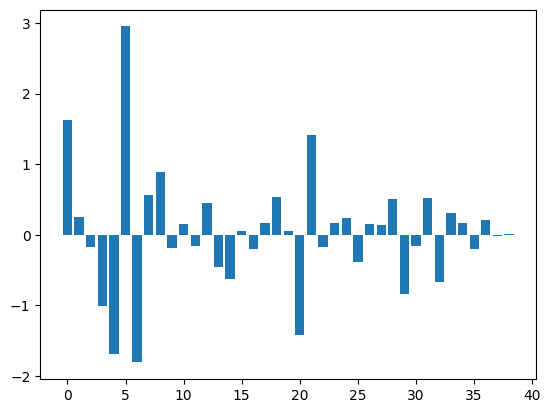

In [ ]:
from matplotlib import pyplot
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#Random Forest
## Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # create an instance of LinearRegression class
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# calculate the r-squared
from sklearn import metrics

r_squared = model.score(X_train, y_train)
print(r_squared)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE)


1.0
Mean Absolute Error: 0.22751046025104602
Mean Squared Error: 0.22751046025104602
Root Mean Squared Error: 0.4769805659049916


A higher R squared and lower mean absolute error indicates this model outperforms the logistic regression model.


##Feature Importance
### Travel time again appears to be the most important feature in this model.

<Axes: >

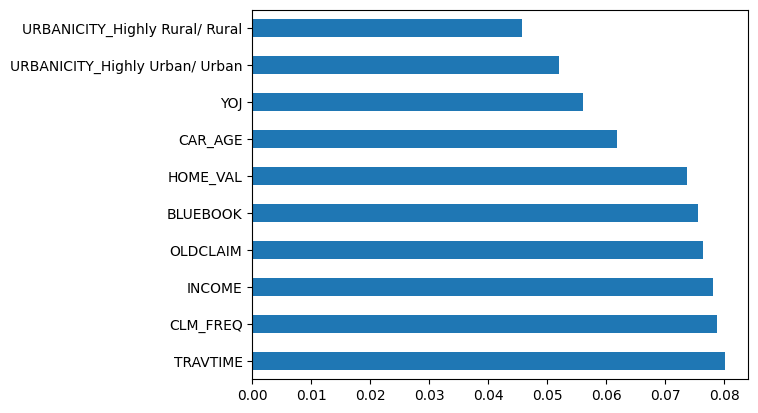

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Tensorflow model using 3 layers with Adam optimizer

In [ ]:
import tensorflow as tf

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add another layerlayer
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # Adam is alternate to SGD
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
263/263 [==============================] - 2s 3ms/step - loss: 0.3718 - mae: 0.3718
Epoch 2/25
263/263 [==============================] - 1s 3ms/step - loss: 0.3444 - mae: 0.3444
Epoch 3/25
263/263 [==============================] - 1s 3ms/step - loss: 0.3394 - mae: 0.3394
Epoch 4/25
263/263 [==============================] - 1s 3ms/step - loss: 0.3372 - mae: 0.3372
Epoch 5/25
263/263 [==============================] - 1s 3ms/step - loss: 0.3323 - mae: 0.3323
Epoch 6/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3308 - mae: 0.3308
Epoch 7/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3310 - mae: 0.3310
Epoch 8/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3296 - mae: 0.3296
Epoch 9/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3304 - mae: 0.3304
Epoch 10/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3278 - mae: 0.3278
Epoch 11/25
263/263 [============================

In [ ]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.2786 - mae: 0.2786


[0.27856215834617615, 0.27856215834617615]

A mae of 0.2786 indicates it is performing less well than the random forest model and would probably benefit from a larger training dataset.